In [1]:
#About Dataset
#Context
#Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

#Content
#The target feature is
#Drug type
#The feature sets are:
#Age
#Sex
#Blood Pressure Levels (BP)
#Cholesterol Levels
#Na to Potassium Ration
#To determine which drug is more effective in reducing blood pressure and cholesterol with respect to age, Na_to_K, and sex, you can use classification algorithms such as KNN, Random Forest, or Decision Trees. Here's how you can approach it:

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("drug200.csv")

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
#Exploratory data analysis
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
df.head(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX


In [7]:
# Define mappings
bp_map = {'LOW': 0, 'NORMAL': 2, 'HIGH': 1}
cholesterol_map = {'LOW': 0, 'HIGH': 1}
drug_map = {'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'DrugY': 5}

In [8]:
# Replace categorical values with numerical values
df['BP'] = df['BP'].replace(bp_map)
df['Cholesterol'] = df['Cholesterol'].replace(cholesterol_map)
df['Drug'] = df['Drug'].replace(drug_map)

In [9]:
df.head(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,1,1,25.355,5
1,47,M,0,1,13.093,3
2,47,M,0,1,10.114,3
3,28,F,2,1,7.798,4
4,61,F,0,1,18.043,5
5,22,F,2,1,8.607,4


In [10]:
df.head(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,1,1,25.355,5
1,47,M,0,1,13.093,3
2,47,M,0,1,10.114,3
3,28,F,2,1,7.798,4
4,61,F,0,1,18.043,5
5,22,F,2,1,8.607,4


C:\Users\imrkm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imrkm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imrkm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


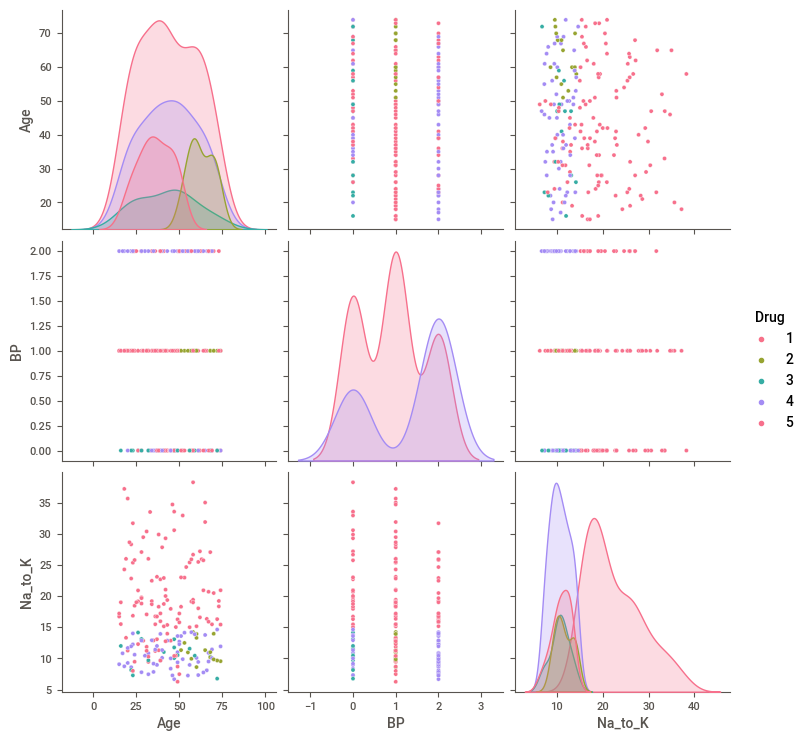

In [11]:
import seaborn as sns
# Create pairplot
sns.pairplot(df, hue='Drug', palette='husl')

KNN Accuracy: 0.675
Random Forest Accuracy: 1.0
Decision Trees Accuracy: 1.0

KNN Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.20      0.33      0.25         3
           3       1.00      0.20      0.33         5
           4       0.54      0.64      0.58        11
           5       1.00      1.00      1.00        15

    accuracy                           0.68        40
   macro avg       0.65      0.53      0.53        40
weighted avg       0.74      0.68      0.67        40


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1

C:\Users\imrkm\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\imrkm\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\imrkm\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


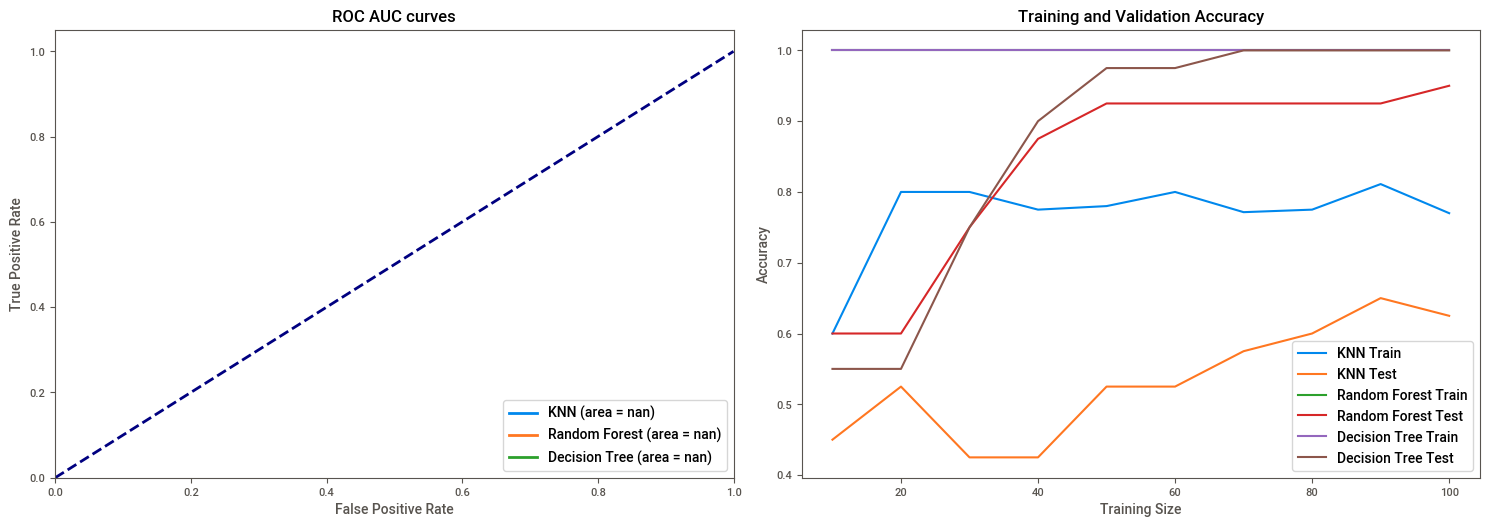

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from ipywidgets import FileUpload, Button, Output, VBox
import io



# Load data
df = pd.read_csv("drug200.csv")

Sex_map = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].replace(Sex_map)

# Define mappings
bp_map = {'LOW': 0, 'NORMAL': 2, 'HIGH': 1}
cholesterol_map = {'LOW': 0, 'NORMAL': 2, 'HIGH': 1}
drug_map = {'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'DrugY': 5}


# Replace categorical values with numerical values
df['BP'] = df['BP'].replace(bp_map)
df['Cholesterol'] = df['Cholesterol'].replace(cholesterol_map)
df['Drug'] = df['Drug'].replace(drug_map)

#split 10% data for predictions


# Split data into features (X) and target variable (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Train models
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predictions
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Trees Accuracy:", dt_accuracy)

# Classification reports
print("\nKNN Classification Report:\n", classification_report(y_test, knn_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nDecision Trees Classification Report:\n", classification_report(y_test, dt_pred)) 

## Plotting ROC/AUC curves and training/validation plots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)

classifiers = {
    "KNN": knn,
    "Random Forest": rf,
    "Decision Tree": dt
}

for name, clf in classifiers.items():
    probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label='DrugY')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC curves')
plt.legend(loc="lower right")

# Training and validation plots
plt.subplot(2, 2, 2)
for name, clf in classifiers.items():
    train_scores = []
    val_scores = []
    for i in range(1, 11):
        clf.fit(X_train[:i * 10], y_train[:i * 10])
        train_scores.append(clf.score(X_train[:i * 10], y_train[:i * 10]))
        val_scores.append(clf.score(X_test, y_test))
    plt.plot(range(10, 101, 10), train_scores, label=name + " Train")
    plt.plot(range(10, 101, 10), val_scores, label=name + " Test")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Function to handle file upload and prediction


def on_file_upload(change):
    out.clear_output()
    for name, file_info in change['new'].items():
        content = file_info['content']
        uploaded_df = pd.read_csv(io.BytesIO(content))
        
        # Replace categorical values with numerical values
        uploaded_df['Sex'] = uploaded_df['Sex'].replace(Sex_map)
        uploaded_df['BP'] = uploaded_df['BP'].replace(bp_map)
        uploaded_df['Cholesterol'] = uploaded_df['Cholesterol'].replace(cholesterol_map)
        
        # Assuming uploaded CSV has the same columns as original data
        uploaded_X = uploaded_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
        
        predictions = rf.predict(uploaded_X)  # Using Random Forest for prediction
        
        with out:
            print("Predictions for Uploaded Data:")
            print(predictions)

# Creating a file upload widget
upload_button = FileUpload(accept=".csv", multiple=False)

# Output widget to display predictions
out = Output()

# Registering the callback function for file upload
upload_button.observe(on_file_upload, names='value')

# Displaying widgets
VBox([upload_button, out])

In [ ]:
#data normalizaton techniques
#Image data set
#